In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [23]:
#Build basic URL for the OpenWeatherMap API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f917d49b6f5b40368f775a1aa43e5268


In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [25]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [26]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [27]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | bhadrak
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | mutsamudu
City not found. Skipping...
Processing Record 5 of Set 1 | dingle
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | flinders
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | puerto del rosario
Processing Record 12 of Set 1 | odesskoye
Processing Record 13 of Set 1 | san jose
Processing Record 14 of Set 1 | san quintin
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | grenfell
Processing Record 17 of Set 1 | caravelas
Processing Record 18 of Set 1 | ongandjera
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | vaini
Pr

Processing Record 37 of Set 4 | adrar
Processing Record 38 of Set 4 | road town
Processing Record 39 of Set 4 | were ilu
Processing Record 40 of Set 4 | kenora
Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | mendoza
Processing Record 43 of Set 4 | darnah
Processing Record 44 of Set 4 | port elizabeth
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | bartica
Processing Record 47 of Set 4 | ewa beach
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | pital
Processing Record 50 of Set 4 | bac giang
Processing Record 1 of Set 5 | zhuhai
Processing Record 2 of Set 5 | espera feliz
Processing Record 3 of Set 5 | nanakuli
Processing Record 4 of Set 5 | svetlyy
Processing Record 5 of Set 5 | letterkenny
Processing Record 6 of Set 5 | zhigansk
Processing Record 7 of Set 5 | filingue
Processing Record 8 of Set 5 | dakar
Processing Record 9 of Set 5 | sao filipe
Processing Record 10 of Se

Processing Record 24 of Set 8 | kuhdasht
Processing Record 25 of Set 8 | kenai
Processing Record 26 of Set 8 | maldonado
Processing Record 27 of Set 8 | constitucion
Processing Record 28 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 29 of Set 8 | alihe
Processing Record 30 of Set 8 | thompson
Processing Record 31 of Set 8 | stara zagora
Processing Record 32 of Set 8 | bugembe
Processing Record 33 of Set 8 | listowel
Processing Record 34 of Set 8 | lazaro cardenas
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | altay
Processing Record 37 of Set 8 | tshela
Processing Record 38 of Set 8 | grand bend
Processing Record 39 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 40 of Set 8 | shimoda
Processing Record 41 of Set 8 | arkhangelsk
Processing Record 42 of Set 8 | palana
Processing Record 43 of Set 8 | sofiyivka
Processing Record 44 of Set 8 | baruun-urt
Processing Record 45 of Set 8 | chuy
Processing Record 46 of Set 8 | kla

Processing Record 15 of Set 12 | vaitape
Processing Record 16 of Set 12 | saint-louis
Processing Record 17 of Set 12 | katsuura
Processing Record 18 of Set 12 | ginir
Processing Record 19 of Set 12 | ames
Processing Record 20 of Set 12 | marang
Processing Record 21 of Set 12 | tigil
Processing Record 22 of Set 12 | pacifica
Processing Record 23 of Set 12 | djougou
Processing Record 24 of Set 12 | khanpur
Processing Record 25 of Set 12 | warqla
City not found. Skipping...
Processing Record 26 of Set 12 | wampusirpi
City not found. Skipping...
Processing Record 27 of Set 12 | iqaluit
Processing Record 28 of Set 12 | marcona
City not found. Skipping...
Processing Record 29 of Set 12 | leh
Processing Record 30 of Set 12 | jackson
Processing Record 31 of Set 12 | nome
Processing Record 32 of Set 12 | kushima
Processing Record 33 of Set 12 | oksfjord
Processing Record 34 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 35 of Set 12 | haines junction
Processing Record 3

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,56.66,86,100,3.53,AU,2021-06-10 17:52:13
1,Bhadrak,21.0633,86.5054,84.45,72,100,3.22,IN,2021-06-10 17:52:13
2,Punta Arenas,-53.1500,-70.9167,39.22,81,0,5.75,CL,2021-06-10 17:52:14
3,Dingle,10.9995,122.6711,76.55,90,98,2.28,PH,2021-06-10 17:52:14
4,Dikson,73.5069,80.5464,29.07,89,93,12.24,RU,2021-06-10 17:52:14
5,Flinders,-34.5833,150.8552,44.19,90,83,1.01,AU,2021-06-10 17:52:15
6,Albany,42.6001,-73.9662,81.63,43,100,4.25,US,2021-06-10 17:48:30
7,Mar Del Plata,-38.0023,-57.5575,61.09,59,20,11.99,AR,2021-06-10 17:52:15
8,Busselton,-33.6500,115.3333,54.05,79,100,3.71,AU,2021-06-10 17:52:15
9,Puerto Del Rosario,28.5004,-13.8627,80.28,73,0,14.97,ES,2021-06-10 17:52:16


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

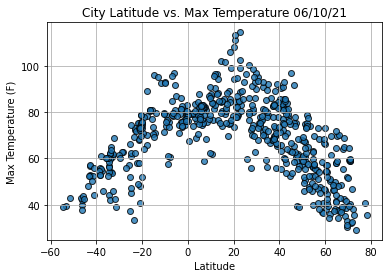

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

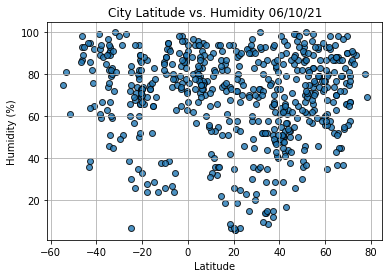

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

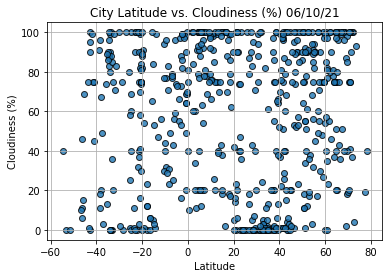

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

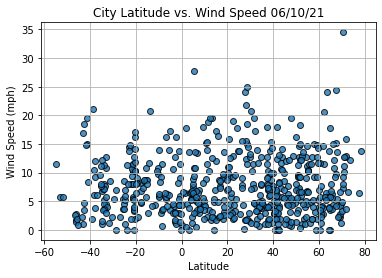

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()